In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def set_path(name_image):
    image_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/img/' + name_image + '.jpg'
    mask_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask/' + name_image + '.jpg'
    mask_pred_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask-pred/' + name_image + '.png'
    fig_pred_path = 'C:/Users/Thep Ho/Desktop/Thesis/sub-task/raw-test/mask-pred/' + 'fig-full-' + name_image + '.png'
    return image_path, mask_path, mask_pred_path, fig_pred_path

In [15]:
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-7-256x256-25ep-94%.h5')
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-3.h5')
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-256x256-25ep-96%.h5')
# unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-256x256-50ep-97%.h5')
unet = keras.models.load_model('C:/Users/Thep Ho/Desktop/Thesis/exported-model/unet-256x256-dataAug-50ep-99%.h5')

In [16]:
def prepareImage(image):
    single_img = Image.open(image).convert('RGB')
    single_img = single_img.resize((256, 256))
    single_img = np.reshape(single_img, (256, 256, 3))
    single_img = single_img/256.
    return single_img

def unet_predict(image):
    img = image[np.newaxis, ...]
    pred_y = unet.predict(img)
    pred_mask = tf.argmax(pred_y[0], axis=-1)
    return pred_mask

In [17]:
image_path, mask_path, mask_pred_path, fig_pred_path = set_path('nt-512')

image = prepareImage(image_path)
y_hat = unet_predict(image)

1/1 [==============================] - 1s 824ms/step


In [18]:
def prepareMask(mask):
    single_mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
    single_mask = cv2.resize(single_mask, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
    single_mask = np.asarray(single_mask)
    single_mask = single_mask[..., tf.newaxis]
    single_mask = np.reshape(single_mask, (256, 256, 1))
    single_mask = np.round(single_mask/255)
    single_mask = single_mask.astype(int)
    return single_mask

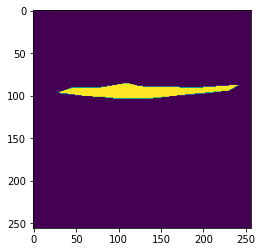

In [19]:
y = prepareMask(mask_path)
plt.imshow(y)

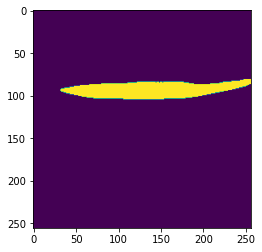

In [20]:
plt.imshow(y_hat)

In [9]:
print(y.shape)
print(y[0])

(256, 256, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [10]:
y_hat = np.reshape(y_hat, (256, 256, 1))
print(y_hat.shape)
print(y_hat[0])

(256, 256, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [11]:
print(y_hat[1].shape)
# plt.imshow(y_hat)

(256, 1)


### Confusion matrix

In [12]:
def res_eval(x,y):
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        Positive_True = 0
        Negative_True = 0
        for j in range(256):
          for k in range(256):
            if round( x[j][k][0])==True and y[j][k][0]==True:
              TP = TP + 1
            elif round( x[j][k][0])==False and y[j][k][0]==False:
              TN = TN + 1
            elif round( x[j][k][0])==True and y[j][k][0]==False:
              FP = FP + 1
            elif round( x[j][k][0])==False and y[j][k][0]==True:
              FN = FN + 1
        return TP, TN, FP, FN

In [ ]:
TP, TN, FP, FN = res_eval(y_hat, y)

In [ ]:
print('TP: ', TP/(256*256))
print('TN: ', TN/(256*256))
print('FP: ', FP/(256*256))
print('FN: ', FN/(256*256))

In [25]:
# Accuracy
acc = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy: ', acc)

# Sensitivity TPR
sens = TP/(TP + FN)
print('TPR: ', sens)

# Specificity TNR
spec = TN/(TN + FP)
print('Specificity: ', spec)

# Precision PPV
prec = TP/(TP + FP)
print('PPV: ', prec)

# F1 score
f1 = 2*(prec*sens)/(prec+sens)
print('F1 score: ', f1)

# DICE
dice = (2*TP)/(2*TP + FP + FN)
print('DICE: ', dice)

# Jaccard
jaccard = TP/(TP + FP + FN)
print('Jaccard: ', jaccard)

# NPV
npv = TN/(TN + FN)
print('NPV: ', npv)

# FNR
fnr = FN/(FN + TP)
print('FNR: ', fnr)

# FPR 
fpr = FP/(FP + TN)
print('FPR: ', fpr)

# FDR 
fdr = FP/(FP + TP)
print('FDR: ', fdr)

# FOR
_for = FN/(FN + TN)
print('FOR: ', _for)

Accuracy:  0.972412109375
TPR:  0.21135209967697277
Specificity:  0.9984377219145008
PPV:  0.822262118491921
F1 score:  0.3362701908957416
DICE:  0.33627019089574156
Jaccard:  0.20211827007943514
NPV:  0.9736991951245787
FNR:  0.7886479003230272
FPR:  0.0015622780854992189
FDR:  0.17773788150807898
FOR:  0.02630080487542129
